In [6]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (28,28,1))
x = layers.Conv2D(32, kernel_size = 3, activation='relu',
                        padding='same')(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, kernel_size = 3, activation='relu',
                             padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, kernel_size = 3, activation='relu',
                             padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         7385

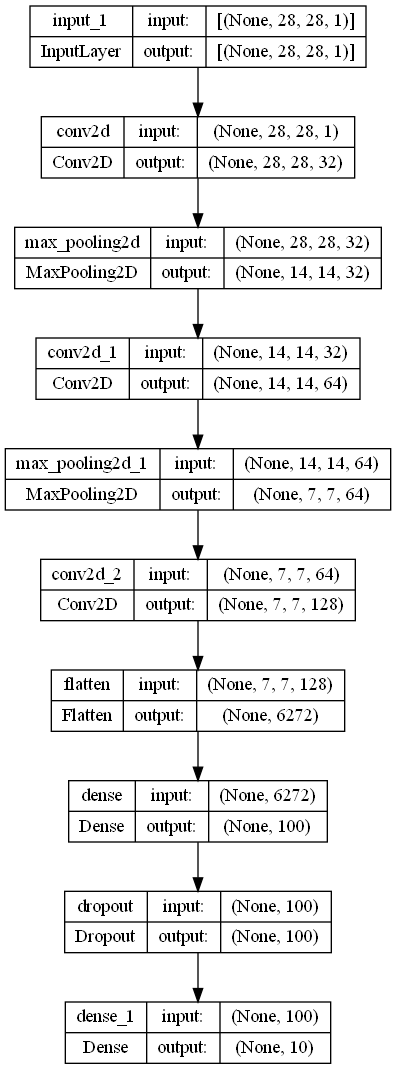

In [4]:
keras.utils.plot_model(model, show_shapes=True)

In [11]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) /255.0
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)  


model.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy')
#checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
#                                                save_best_only = True)
#early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
#                                                restore_best_weights = True)
model.fit(train_scaled, train_target, epochs = 5,
                validation_data = (val_scaled, val_target))
                #callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.1063 - accuracy: 0.9688 - val_loss: 0.0623 - val_accuracy: 0.9820
Epoch 2/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0577 - accuracy: 0.9831 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 3/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0397 - accuracy: 0.9886 - val_loss: 0.0596 - val_accuracy: 0.9874
Epoch 4/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 5/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0422 - val_accuracy: 0.9908
